# Intro

Learning Python and Pandas



Author is Michael McCarthy (mbmccart@utica.edu) 

Feedback Welcomed

In [ ]:
# Any line of code with a hash sign (also known as the pound sign) is a comment and will NOT as code.
#In google Colab, comments turn the font to green. 
""" The tripple quotes, seen here are comments that carry on 
over several lines. 
The whole cell can be commented out """

' The tripple quotes, seen here are comments that carry on \nover several lines. \nThe whole cell can be commented out '

# Libarary Loading

In [ ]:
# Python interactive development enviroments (IDE) come with base Python 3.x but 
#     certain modules, packages, and libraries as need.

# Pandas is the main way we will work with the dataframes
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
import pandas as pd

# MatPlotLib is a common visulaization package. 
# note that just pyplot is added in, not the full package 
from matplotlib import pyplot as plt
#It is a function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline

#numpy is the "The fundamental package for scientific computing with Python"
# https://numpy.org/
import numpy as np
# To remove the scientific notation from numpy arrays remove the hash sign from the next line
np.set_printoptions(suppress=True) #removing the has makes this line runable code, not a comment.

#Setting Seed for reproducable results (important to have tensorflow random seed set as well)
#If the randome seed is not set, then some models will have different results each time (a very frustrating thing) 
#https://datascience.stackexchange.com/questions/13314/causes-of-inconsistent-results-with-neural-network
np.random.seed(1)

# package for descriptive statistics, there are others you can use like seaborne
!pip install researchpy
import researchpy as rp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Packages needed to load data from Google Drive
#https://pypi.org/project/PyDrive/

# In python, the equal sign is used to assinge a variable.  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [ ]:
#check the version of the libraries
print(sns.__version__)
#this print command can be updated and reused for any library 
print(rp.__version__)

In [ ]:
# Authenticate users to have acces to google Drive.  Click the link to get the code to paste in.
# aometimes, just approving the access is all that is needed.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# DATA Loading

In [ ]:
# dataset from Google Drive
# Find the dataset
# click share
# copy link
# it should look something like this: https://drive.google.com/file/d/1WVluSCNJ--RS1zqQ_0EJScPgurw9CmHj/view?usp=sharing
# copy the unique file id: 1WVluSCNJ--RS1zqQ_0EJScPgurw9CmHj
# paste unique google doc file id into the code below
downloaded = drive.CreateFile({'id':'1WVluSCNJ--RS1zqQ_0EJScPgurw9CmHj'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Heart_Synthetic.csv')
#read into pandas dataframe 
df = pd.read_csv('Heart_Synthetic.csv') 
print("Data Shape: ",df.shape)

print(df.head)


Data Shape:  (303, 18)
<bound method NDFrame.head of      RecordID  age  ca  trestbps  chol  thalach  oldpeak          SSN  \
0           1   63   0       145   233      150      2.3  616-95-2670   
1           2   37   0       130   250      187      3.5  579-42-1915   
2           3   41   0       130   204      172      1.4  332-33-7829   
3           4   56   0       120   236      178      0.8  436-60-6488   
4           5   57   0       120   354      163      0.6  856-35-7953   
..        ...  ...  ..       ...   ...      ...      ...          ...   
298       299   57   0       140   241      123      0.2  998-26-6265   
299       300   45   0       110   264      132      1.2  198-72-3942   
300       301   68   2       144   193      141      3.4  702-54-9371   
301       302   57   1       130   131      115      1.2  770-82-2614   
302       303   57   1       130   236      174      0.0  387-12-9600   

    SEX_string            CP_string         RESTECG_string EXANG_strin

# Wrangling

In [ ]:

df['RecordID']  #"RecordID" includedeld in dataset but removed because not variable in the analysis


0        1
1        2
2        3
3        4
4        5
      ... 
298    299
299    300
300    301
301    302
302    303
Name: RecordID, Length: 303, dtype: int64

In [ ]:
# Assess the Data types.  Make sure we have numbers, not just strings.
print("\nTraining DATA\n")
print(df.dtypes)



Training DATA

RecordID            int64
age                 int64
ca                  int64
trestbps            int64
chol                int64
thalach             int64
oldpeak           float64
SSN                object
SEX_string         object
CP_string          object
RESTECG_string     object
EXANG_string       object
FBS_string         object
SLOPE_string       object
THAL_string        object
TARGET_string      object
Race_String        object
incident          float64
dtype: object


In [ ]:
#descriptive statistics
df.describe()


,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.366337,0.663366,131.623762,246.264026,149.646865,1.039604,6.053644
std,87.612784,9.082101,0.934375,17.538143,51.830751,22.905161,1.161075,13.077695
min,1.000000,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.038000
25%,76.500000,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,1.427500
50%,152.000000,55.000000,0.000000,130.000000,240.000000,153.000000,0.800000,2.442000
75%,227.500000,61.000000,1.000000,140.000000,274.500000,166.000000,1.600000,4.445000
max,303.000000,77.000000,3.000000,200.000000,564.000000,202.000000,6.200000,138.338000


In [ ]:
#Call the dataframe to show the variables and open Interactive table in Colab (click the magic wand icon under the table on the left)
df

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident
0,1,63,0,145,233,150,2.3,616-95-2670,male,asymptomatic angina,normal,no,HIGH,upsloping,normal,asymptomatic,white,3.803
1,2,37,0,130,250,187,3.5,579-42-1915,male,non-angina,ST-T wave abnormality,no,low,upsloping,fixed defect,asymptomatic,black,2.815
2,3,41,0,130,204,172,1.4,332-33-7829,female,atypical angina,normal,no,low,downsloping,fixed defect,asymptomatic,white,1.854
3,4,56,0,120,236,178,0.8,436-60-6488,male,atypical angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,black,23.172
4,5,57,0,120,354,163,0.6,856-35-7953,female,typical angina,ST-T wave abnormality,yes,low,downsloping,fixed defect,asymptomatic,white,13.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,57,0,140,241,123,0.2,998-26-6265,female,typical angina,ST-T wave abnormality,yes,low,flat,reversable defect,heart disease,white,2.074
299,300,45,0,110,264,132,1.2,198-72-3942,male,asymptomatic angina,ST-T wave abnormality,no,low,flat,reversable defect,heart disease,white,1.935
300,301,68,2,144,193,141,3.4,702-54-9371,male,typical angina,ST-T wave abnormality,no,HIGH,flat,reversable defect,heart disease,white,36.971
301,302,57,1,130,131,115,1.2,770-82-2614,male,typical angina,ST-T wave abnormality,yes,low,flat,reversable defect,heart disease,white,1.886


In [ ]:
#It is possible to make new variables with math
#in this case, I will make a new variable by dividing one variable by another.  
#because there could be multiple dataframes with the same variable name, I must identifiy the df AND the variable name 
df["risk"] = (df["thalach"] + df["chol"])

In [ ]:
#see the results of the new variable.
df.filter(["risk"]).describe()

,risk
count,303.000000
mean,395.910891
std,56.457702
min,246.000000
25%,364.000000
50%,393.000000
75%,428.500000
max,724.000000


# matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e6a752d0>]],
      dtype=object)

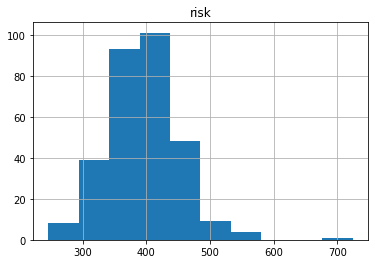

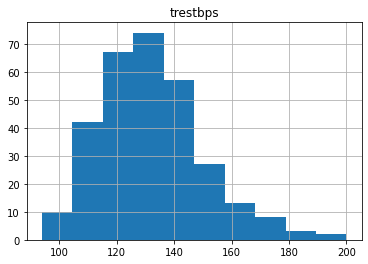

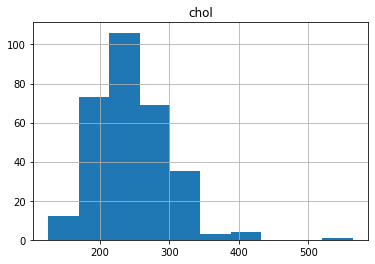

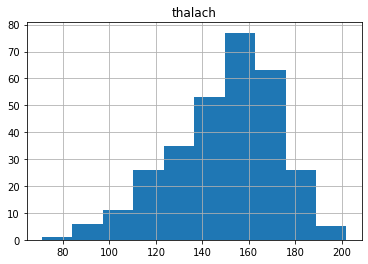

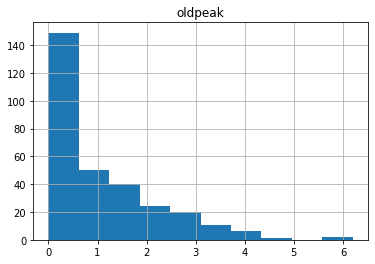

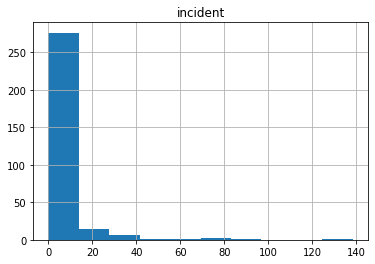

In [ ]:
#lots of histograms from matplotlib
df.hist('risk')
df.hist('trestbps')
df.hist('chol')
df.hist("thalach")
df.hist("oldpeak")
df.hist("incident")

# seaborn

In [ ]:
import seaborn as sns

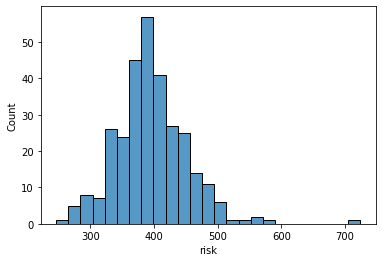

In [ ]:
#build the same histogram with seaborn library
#you have lots of options
sns.histplot(data=df, x='risk')

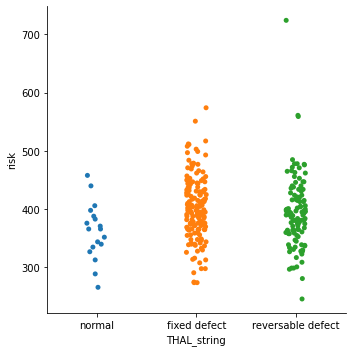

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(data=df, x="THAL_string", y="risk")

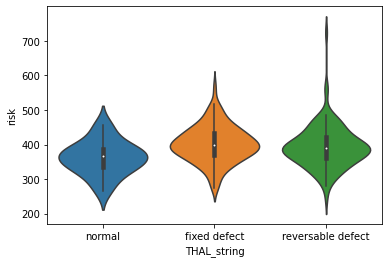

In [ ]:
#same data, but with a violin plot
#https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
sns.violinplot(data=df, x="THAL_string", y="risk")

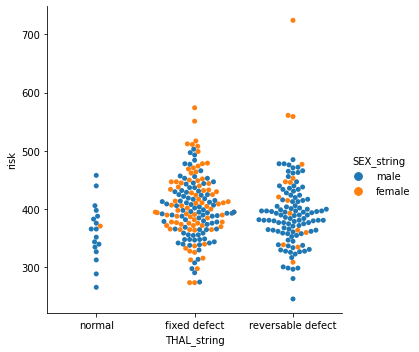

In [ ]:
#swarm Plot
#https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
sns.catplot(data=df, x="THAL_string", y="risk", hue="SEX_string", kind="swarm")


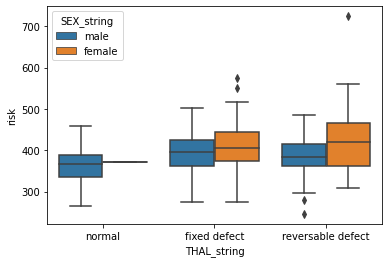

In [ ]:
#Box & Whisker
#https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
sns.boxplot(data=df, x="THAL_string", y="risk", hue="SEX_string")

# plotly

In [ ]:
#Look at the Dependent Variable as it relates to these categorical variables
#consider this type of side-by-side box and whisker
#https://plotly.com/python/plotly-express/
import plotly.express as px
px.box(data_frame=df,x='SEX_string', y='incident')


In [ ]:
px.box(data_frame=df,x='Race_String', y='incident')
# does the plot show outliers????

# query() in Pandas

In [ ]:
# VERY IMPORTANT
#column names can not have spaces for Pandas Querry
df.columns=[x.replace(" ", "_") for x in df.columns]
df.dtypes #look at new column names

RecordID            int64
age                 int64
ca                  int64
trestbps            int64
chol                int64
thalach             int64
oldpeak           float64
SSN                object
SEX_string         object
CP_string          object
RESTECG_string     object
EXANG_string       object
FBS_string         object
SLOPE_string       object
THAL_string        object
TARGET_string      object
Race_String        object
incident          float64
risk                int64
dtype: object

In [ ]:
# A pandas query is writen as a long string. 
"""
It is important that double quotes are used to define the querry and 
single quotes used to identify categories (e.g., 'male' below)
"""
df.query("age > 65 and 	SEX_string == 'male'", inplace=False)

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
51,52,66,0,120,302,151,0.4,830-63-6345,male,typical angina,normal,no,low,flat,fixed defect,asymptomatic,black,2.172,453
86,87,68,1,118,277,151,1.0,531-31-3827,male,non-angina,ST-T wave abnormality,no,low,downsloping,reversable defect,asymptomatic,asian,2.442,428
106,107,69,1,160,234,131,0.1,558-69-3909,male,asymptomatic angina,normal,no,HIGH,flat,fixed defect,asymptomatic,black,0.556,365
145,146,70,0,156,245,143,0.0,222-87-2550,male,atypical angina,normal,no,low,downsloping,fixed defect,asymptomatic,white,1.013,388
150,151,66,0,160,228,138,2.3,461-50-6421,male,typical angina,normal,no,low,downsloping,normal,asymptomatic,white,7.853,366
165,166,67,3,160,286,108,1.5,582-60-5363,male,typical angina,normal,yes,low,flat,fixed defect,heart disease,white,1.202,394
166,167,67,2,120,229,129,2.6,622-11-3974,male,typical angina,normal,yes,low,flat,reversable defect,heart disease,white,25.727,358
197,198,67,2,125,254,163,0.2,696-34-3062,male,typical angina,ST-T wave abnormality,no,HIGH,flat,reversable defect,heart disease,white,8.853,417
203,204,68,0,180,274,150,1.6,424-47-8363,male,non-angina,normal,yes,HIGH,flat,reversable defect,heart disease,white,1.837,424
225,226,70,0,145,174,125,2.6,433-76-7161,male,typical angina,ST-T wave abnormality,yes,low,upsloping,reversable defect,heart disease,white,1.101,299


In [ ]:
#column names can not have spaces for Pandas Query
#dfTrain.columns=[x.replace(" ", "_") for x in dfTrain.columns]
# using the and to make a multiple criteria
#if pointing to categorical data, the criteria should be in single quotes

df.query("age > 45 and ca>0 and RESTECG_string=='normal'", inplace=False)

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
28,29,65,1,140,417,157,0.8,970-50-8286,female,non-angina,normal,no,HIGH,downsloping,fixed defect,asymptomatic,black,1.712,574
33,34,54,1,125,273,152,0.5,119-45-8611,male,non-angina,normal,no,low,upsloping,fixed defect,asymptomatic,black,0.368,425
34,35,51,1,125,213,125,1.4,495-26-9061,male,asymptomatic angina,normal,yes,low,downsloping,fixed defect,asymptomatic,black,1.143,338
40,41,51,1,140,308,142,1.5,993-13-8521,female,non-angina,normal,no,low,downsloping,fixed defect,asymptomatic,black,3.035,450
59,60,57,1,128,303,159,0.0,608-65-8787,female,typical angina,normal,no,low,downsloping,fixed defect,asymptomatic,black,2.610,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,57,1,154,232,164,0.0,784-13-3567,male,atypical angina,normal,no,low,downsloping,fixed defect,heart disease,white,0.986,396
292,293,58,2,170,225,146,2.8,910-74-1041,female,typical angina,normal,yes,HIGH,flat,normal,heart disease,white,1.966,371
295,296,63,2,140,187,144,4.0,569-28-1370,male,typical angina,normal,yes,low,downsloping,reversable defect,heart disease,white,2.144,331
297,298,59,2,164,176,90,1.0,697-55-5527,male,typical angina,normal,no,HIGH,flat,normal,heart disease,white,4.409,266


In [ ]:
# same query as above but with "or" satement with bar |
#same query but with or statements
df.query("age > 45 | 	ca>0 |RESTECG_string=='normal'",inplace=False)

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
0,1,63,0,145,233,150,2.3,616-95-2670,male,asymptomatic angina,normal,no,HIGH,upsloping,normal,asymptomatic,white,3.803,383
2,3,41,0,130,204,172,1.4,332-33-7829,female,atypical angina,normal,no,low,downsloping,fixed defect,asymptomatic,white,1.854,376
3,4,56,0,120,236,178,0.8,436-60-6488,male,atypical angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,black,23.172,414
4,5,57,0,120,354,163,0.6,856-35-7953,female,typical angina,ST-T wave abnormality,yes,low,downsloping,fixed defect,asymptomatic,white,13.378,517
5,6,57,0,140,192,148,0.4,223-11-7761,male,typical angina,ST-T wave abnormality,no,low,flat,normal,asymptomatic,black,6.235,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,59,2,164,176,90,1.0,697-55-5527,male,typical angina,normal,no,HIGH,flat,normal,heart disease,white,4.409,266
298,299,57,0,140,241,123,0.2,998-26-6265,female,typical angina,ST-T wave abnormality,yes,low,flat,reversable defect,heart disease,white,2.074,364
300,301,68,2,144,193,141,3.4,702-54-9371,male,typical angina,ST-T wave abnormality,no,HIGH,flat,reversable defect,heart disease,white,36.971,334
301,302,57,1,130,131,115,1.2,770-82-2614,male,typical angina,ST-T wave abnormality,yes,low,flat,reversable defect,heart disease,white,1.886,246


In [ ]:
# same query as bove but with describe()
df.query("age > 45 | 	ca>0 |RESTECG_string=='normal'",inplace=False).describe()

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident,risk
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,154.947368,56.263158,0.755639,132.669173,249.860902,147.372180,1.093609,5.536241,397.233083
std,88.033426,7.947369,0.961753,17.910563,52.147608,22.566142,1.171935,10.814664,57.861825
min,1.000000,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.038000,246.000000
25%,78.250000,51.000000,0.000000,120.000000,212.250000,132.000000,0.000000,1.403000,364.000000
50%,160.500000,57.000000,0.000000,130.000000,244.500000,151.000000,0.800000,2.394500,393.500000
75%,231.750000,62.000000,1.000000,140.000000,277.750000,163.000000,1.800000,4.457500,430.000000
max,303.000000,77.000000,3.000000,200.000000,564.000000,202.000000,6.200000,85.169000,724.000000


In [ ]:
df.query("ca != 0 and SEX_string > 'female' ").describe()

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident,risk
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,210.890110,57.835165,1.626374,130.659341,246.395604,139.318681,1.393407,6.190571,385.714286
std,66.305932,6.873886,0.769536,16.587291,44.713130,23.390824,1.168646,13.964996,49.679257
min,34.000000,42.000000,1.000000,94.000000,126.000000,88.000000,0.000000,0.355000,246.000000
25%,182.500000,54.000000,1.000000,120.000000,217.000000,124.500000,0.200000,1.172500,360.500000
50%,220.000000,58.000000,1.000000,130.000000,248.000000,142.000000,1.200000,2.089000,389.000000
75%,262.500000,62.000000,2.000000,140.000000,279.000000,159.000000,2.200000,3.711000,418.000000
max,302.000000,77.000000,3.000000,192.000000,353.000000,195.000000,4.400000,85.169000,485.000000


In [ ]:
#This shows just the descriptive statistics ( with .describe() ) for two variables (after ".filter") for data that matches the query
print(df.query("ca != 0").filter(['age', 'FBS_string']).describe())

              age
count  123.000000
mean    58.585366
std      7.061703
min     41.000000
25%     54.000000
50%     58.000000
75%     63.000000
max     77.000000


In [ ]:
#define a new dataframe with the equals sign with the query criteria
new_criteria = 1.3
df_filter=df.query("oldpeak > @new_criteria")
# print(df_filter.head)
print(df_filter.shape)

(103, 19)


In [ ]:
#Useing a variable to define criteria 
new_criteria=1.4
#use the "@" to designate the variable in the string query
df.query("oldpeak > @new_criteria")

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
0,1,63,0,145,233,150,2.3,616-95-2670,male,asymptomatic angina,normal,no,HIGH,upsloping,normal,asymptomatic,white,3.803,383
1,2,37,0,130,250,187,3.5,579-42-1915,male,non-angina,ST-T wave abnormality,no,low,upsloping,fixed defect,asymptomatic,black,2.815,437
9,10,57,0,150,168,174,1.6,305-32-2475,male,non-angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,asian,3.670,342
13,14,64,0,110,211,144,1.8,132-70-8353,male,asymptomatic angina,normal,yes,low,flat,fixed defect,asymptomatic,asian,23.084,355
15,16,50,0,120,219,158,1.6,777-22-2997,female,non-angina,ST-T wave abnormality,no,low,flat,fixed defect,asymptomatic,black,1.986,377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,58,3,114,318,140,4.4,302-15-9263,male,typical angina,left ventricular hypertrophy,no,low,upsloping,normal,heart disease,white,1.398,458
292,293,58,2,170,225,146,2.8,910-74-1041,female,typical angina,normal,yes,HIGH,flat,normal,heart disease,white,1.966,371
294,295,44,0,120,169,144,2.8,815-80-7036,male,typical angina,ST-T wave abnormality,yes,low,upsloping,normal,heart disease,white,2.833,313
295,296,63,2,140,187,144,4.0,569-28-1370,male,typical angina,normal,yes,low,downsloping,reversable defect,heart disease,white,2.144,331


# filter

In [ ]:
#Descriptive Statistics for query results 
# https://www.youtube.com/watch?v=mBZwYUaIRfY
df_filter.describe()

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident,risk
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,178.514563,56.650485,1.000000,134.495146,247.796117,139.941748,2.376699,5.943825,387.737864
std,88.108430,8.672368,1.066422,17.360014,59.928447,21.707424,0.941443,11.890539,63.004351
min,1.000000,35.000000,0.000000,104.000000,149.000000,95.000000,1.400000,0.310000,274.000000
25%,117.500000,52.000000,0.000000,120.000000,209.500000,125.000000,1.600000,1.484000,344.500000
50%,197.000000,58.000000,1.000000,132.000000,239.000000,141.000000,2.000000,2.516000,381.000000
75%,246.000000,63.000000,2.000000,143.000000,282.000000,157.000000,2.850000,4.293000,419.000000
max,301.000000,71.000000,3.000000,200.000000,564.000000,187.000000,6.200000,80.756000,724.000000


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html?highlight=filter#pandas.DataFrame.filter
# filter string (object) data if it has a certain string in it.  
df['THAL_string'].str.contains('defect')
#returns a boolean Ture or False


0      False
1       True
2       True
3       True
4       True
       ...  
298     True
299     True
300     True
301     True
302     True
Name: THAL_string, Length: 303, dtype: object

# loc & iloc in Pandas

In [ ]:
#loc selects rows and columns with specific labels
#iloc selcts rows and columns by index
# to find particular rows , colums
df_filter.iloc[0:12,10:12] 
#the iloc will return the first 13 items from the filtered df
#EXANG_string	FBS_string are columns 10 & 11 (the range is exclusive on the high side meaning that 12 is not include)
#if you want column 12, update to "10:13"

,RESTECG_string,EXANG_string
0,normal,no
1,ST-T wave abnormality,no
2,normal,no
9,ST-T wave abnormality,no
13,normal,yes
15,ST-T wave abnormality,no
17,ST-T wave abnormality,no
18,ST-T wave abnormality,no
19,ST-T wave abnormality,no
24,ST-T wave abnormality,yes


In [ ]:
#loc for the same 
df_filter.loc[:12,['EXANG_string','FBS_string']] 
#the loc will return the first items in index 0-12 from the filtered df
# remember, df_filter has rows that were filtered away.
# the loc and iloc would be the same on the orginal df 

,EXANG_string,FBS_string
0,no,HIGH
1,no,low
2,no,low
9,no,low


In [ ]:
df.loc[:12,['EXANG_string','FBS_string']] 

,EXANG_string,FBS_string
0,no,HIGH
1,no,low
2,no,low
3,no,low
4,yes,low
5,no,low
6,no,low
7,no,low
8,no,HIGH
9,no,low


In [ ]:
df.iloc[0:12,10:12] 

,RESTECG_string,EXANG_string
0,normal,no
1,ST-T wave abnormality,no
2,normal,no
3,ST-T wave abnormality,no
4,ST-T wave abnormality,yes
5,ST-T wave abnormality,no
6,normal,no
7,ST-T wave abnormality,no
8,ST-T wave abnormality,no
9,ST-T wave abnormality,no


In [ ]:
#looking through the filtered dataset
df_filter.iloc[0:12] #only looking through index 0-12 (the filtered data only has a few outputs for this range)
# NOTE in the loc statement, the [0:12] above is the same as [:12] used in the next cell below

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
0,1,63,0,145,233,150,2.3,616-95-2670,male,asymptomatic angina,normal,no,HIGH,upsloping,normal,asymptomatic,white,3.803,383
1,2,37,0,130,250,187,3.5,579-42-1915,male,non-angina,ST-T wave abnormality,no,low,upsloping,fixed defect,asymptomatic,black,2.815,437
2,3,41,0,130,204,172,1.4,332-33-7829,female,atypical angina,normal,no,low,downsloping,fixed defect,asymptomatic,white,1.854,376
9,10,57,0,150,168,174,1.6,305-32-2475,male,non-angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,asian,3.670,342
13,14,64,0,110,211,144,1.8,132-70-8353,male,asymptomatic angina,normal,yes,low,flat,fixed defect,asymptomatic,asian,23.084,355
15,16,50,0,120,219,158,1.6,777-22-2997,female,non-angina,ST-T wave abnormality,no,low,flat,fixed defect,asymptomatic,black,1.986,377
17,18,66,0,150,226,114,2.6,265-96-4194,female,asymptomatic angina,ST-T wave abnormality,no,low,upsloping,fixed defect,asymptomatic,white,7.887,340
18,19,43,0,150,247,171,1.5,261-20-6968,male,typical angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,asian,3.305,418
19,20,69,2,140,239,151,1.8,728-30-6800,female,asymptomatic angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,black,3.403,390
24,25,40,0,140,199,178,1.4,606-44-2774,male,asymptomatic angina,ST-T wave abnormality,yes,low,downsloping,reversable defect,asymptomatic,white,1.008,377


In [ ]:
#the Full dataframe (unfiltered) has all the values in indices 1-12
df.iloc[:12]

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,SSN,SEX_string,CP_string,RESTECG_string,EXANG_string,FBS_string,SLOPE_string,THAL_string,TARGET_string,Race_String,incident,risk
0,1,63,0,145,233,150,2.3,616-95-2670,male,asymptomatic angina,normal,no,HIGH,upsloping,normal,asymptomatic,white,3.803,383
1,2,37,0,130,250,187,3.5,579-42-1915,male,non-angina,ST-T wave abnormality,no,low,upsloping,fixed defect,asymptomatic,black,2.815,437
2,3,41,0,130,204,172,1.4,332-33-7829,female,atypical angina,normal,no,low,downsloping,fixed defect,asymptomatic,white,1.854,376
3,4,56,0,120,236,178,0.8,436-60-6488,male,atypical angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,black,23.172,414
4,5,57,0,120,354,163,0.6,856-35-7953,female,typical angina,ST-T wave abnormality,yes,low,downsloping,fixed defect,asymptomatic,white,13.378,517
5,6,57,0,140,192,148,0.4,223-11-7761,male,typical angina,ST-T wave abnormality,no,low,flat,normal,asymptomatic,black,6.235,340
6,7,56,0,140,294,153,1.3,347-55-3572,female,atypical angina,normal,no,low,flat,fixed defect,asymptomatic,white,2.263,447
7,8,44,0,120,263,173,0.0,255-30-4260,male,atypical angina,ST-T wave abnormality,no,low,downsloping,reversable defect,asymptomatic,white,36.234,436
8,9,52,0,172,199,162,0.5,231-37-7786,male,non-angina,ST-T wave abnormality,no,HIGH,downsloping,reversable defect,asymptomatic,asian,2.312,361
9,10,57,0,150,168,174,1.6,305-32-2475,male,non-angina,ST-T wave abnormality,no,low,downsloping,fixed defect,asymptomatic,asian,3.670,342


In [ ]:
# basic feature engineering, adding a new variable
df_filter["year_born"]= 2022-df_filter["age"]
print(df_filter["year_born"].head(10))

0     1959
1     1985
2     1981
9     1965
13    1958
15    1972
17    1956
18    1979
19    1953
24    1982
Name: year_born, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# TWO ways to build dataframes based on two ways to search data loc and Query()
oldMenQ = df.query("SEX_string == 'male' and age > 65", inplace=False)
oldMenI = df.loc[(df.SEX_string == 'male') & (df.age > 65 )]
print(oldMenI.shape)
print(oldMenQ.shape)

(20, 19)
(20, 19)


In [ ]:
#should be the same numbers for the oldMenI and oldMenQ
oldMenI.describe()

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident,risk
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,205.250000,68.250000,1.350000,139.350000,252.550000,132.85000,1.290000,9.343300,385.400000
std,69.546558,2.510504,1.225819,21.337575,39.318504,21.91917,1.117752,19.203046,45.613248
min,52.000000,66.000000,0.000000,100.000000,174.000000,71.00000,0.000000,0.360000,299.000000
25%,162.250000,67.000000,0.000000,120.000000,228.750000,123.75000,0.175000,1.176750,361.000000
50%,230.500000,67.500000,1.000000,142.000000,250.000000,135.00000,1.000000,2.307000,384.500000
75%,251.000000,69.250000,2.250000,160.000000,279.250000,150.00000,2.325000,4.456250,424.000000
max,301.000000,77.000000,3.000000,180.000000,322.000000,163.00000,3.400000,80.756000,466.000000


In [ ]:
oldMenQ.describe()

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,incident,risk
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,205.250000,68.250000,1.350000,139.350000,252.550000,132.85000,1.290000,9.343300,385.400000
std,69.546558,2.510504,1.225819,21.337575,39.318504,21.91917,1.117752,19.203046,45.613248
min,52.000000,66.000000,0.000000,100.000000,174.000000,71.00000,0.000000,0.360000,299.000000
25%,162.250000,67.000000,0.000000,120.000000,228.750000,123.75000,0.175000,1.176750,361.000000
50%,230.500000,67.500000,1.000000,142.000000,250.000000,135.00000,1.000000,2.307000,384.500000
75%,251.000000,69.250000,2.250000,160.000000,279.250000,150.00000,2.325000,4.456250,424.000000
max,301.000000,77.000000,3.000000,180.000000,322.000000,163.00000,3.400000,80.756000,466.000000


# data prep for modeling

In [ ]:
#Drop SSN and other id variables that are not needed in the modeling
del df['SSN']  # "SSN" included in dataset but removed because not variable in the analysis

In [ ]:
#assess the shape before get dummies
df.shape

(303, 18)

In [ ]:
# load variable name to paste into get dummies below
df.dtypes

RecordID            int64
age                 int64
ca                  int64
trestbps            int64
chol                int64
thalach             int64
oldpeak           float64
SEX_string         object
CP_string          object
RESTECG_string     object
EXANG_string       object
FBS_string         object
SLOPE_string       object
THAL_string        object
TARGET_string      object
Race_String        object
incident          float64
risk                int64
dtype: object

In [ ]:
#some categorical variables need to be transformed into numbers via one-hot encoding or get dummies.
#This is very important to do BEFORE splitting data into Testing and Training
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

df= pd.get_dummies(data=df)
# NOTE the use of df for the dataframe name with get dummies will update the df for now on. 
# If I want a unique data frame that is different from the orginal dataframe, I need a different name like 'df_model'
#,columns=["SEX_string", "CP_string", "RESTECG_string","EXANG_string","FBS_string","SLOPE_string","THAL_string","Race_String"]

In [ ]:
#note that the shape went from 17 columns to 32 columns 
df.shape

(303, 33)

In [ ]:
# import sklearn for one hot encoding and test train split
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
import sklearn

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# interesting article about why one-hot encoding (ohe) is better in ML
# https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
"""
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(
    categories='categorical_Variable_Name',  # Categories determinded automatically from a particualr feature (variable) or can be specifically delineated (see sklearn documentation link).
    drop=None, # none means not drop one of the features, this is more important for dichotomous categorical variables (e.g., click, not-click) 
    sparse=True, # Will return sparse matrix if set True; a sparse matrix is more likely the more categories in the variable. "sparse matrix or sparse array is a matrix in which most of the elements are zero"
    dtype=<class 'numpy.float64'>, # Desired data type of the output; the input is a string; in most cases the ohe process is meant to make a number from strings.
    handle_unknown='error' # Whether to raise an error; good to accept the default.  
)         
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['categorical_Variable_Name])
print(transformed.toarray())
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\nOneHotEncoder(\n    categories=\'categorical_Variable_Name\',  # Categories determinded automatically from a particualr feature (variable) or can be specifically delineated (see sklearn documentation link).\n    drop=None, # none means not drop one of the features, this is more important for dichotomous categorical variables (e.g., click, not-click) \n    sparse=True, # Will return sparse matrix if set True; a sparse matrix is more likely the more categories in the variable. "sparse matrix or sparse array is a matrix in which most of the elements are zero"\n    dtype=<class \'numpy.float64\'>, # Desired data type of the output; the input is a string; in most cases the ohe process is meant to make a number from strings.\n    handle_unknown=\'error\' # Whether to raise an error; good to accept the default.  \n)         \nohe = OneHotEncoder()\ntransformed = ohe.fit_transform(df[\'categorical_Variable_Name])\nprint(transformed.toarray())

In [ ]:
#load test train split
from sklearn.model_selection import train_test_split

In [ ]:
df.dtypes

RecordID                                         int64
age                                              int64
ca                                               int64
trestbps                                         int64
chol                                             int64
thalach                                          int64
oldpeak                                        float64
incident                                       float64
risk                                             int64
SEX_string_female                                uint8
SEX_string_male                                  uint8
CP_string_asymptomatic angina                    uint8
CP_string_atypical angina                        uint8
CP_string_non-angina                             uint8
CP_string_typical angina                         uint8
RESTECG_string_ST-T wave abnormality             uint8
RESTECG_string_left ventricular hypertrophy      uint8
RESTECG_string_normal                            uint8
EXANG_stri

In [ ]:
# need to drop so extra categories, especially for dichotmous variables
# del used above to remove one variable, but df.drop used here to remove multiple columns in one go
df.drop(['SEX_string_male','TARGET_string_asymptomatic',
         'TARGET_string_heart disease', 'FBS_string_low', 'EXANG_string_no'], 
        axis=1, #axis 1 means columns, the drop tool can work on rows if axis=0 . . . which is the default
        inplace=True)
 # We only want numerical data for the linear regression
 # all "target" variables are used for the classification analysis we can do with this data set so not needed for the regression

In [ ]:
#look to see if the columsn were dropped
df.dtypes

RecordID                                         int64
age                                              int64
ca                                               int64
trestbps                                         int64
chol                                             int64
thalach                                          int64
oldpeak                                        float64
incident                                       float64
risk                                             int64
SEX_string_female                                uint8
CP_string_asymptomatic angina                    uint8
CP_string_atypical angina                        uint8
CP_string_non-angina                             uint8
CP_string_typical angina                         uint8
RESTECG_string_ST-T wave abnormality             uint8
RESTECG_string_left ventricular hypertrophy      uint8
RESTECG_string_normal                            uint8
EXANG_string_yes                                 uint8
FBS_string

In [ ]:
#stratified sampling 
#Step 2, random sample of each DF (in this case, SEX_string == female and  SEX_string==male)
# Format from Stackoverflow
#larger, smaller = test_train_split(df, test_size=0.3)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
X = df.drop("incident",axis='columns')
y =df["incident"]
print(y.shape)
print(X.shape)
stratVar=X["SEX_string_female"] #define the variable used for the stratified sample 
# a stratified sample ensures an equal representation of a particular category (or group) is in both the training and testin dataframes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.8, train_size=.2, random_state=7, shuffle=True, stratify=stratVar)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#read more
# k fold stratification
#https://scikit-learn.org/stable/modules/cross_validation.html#stratification

(303,)
(303, 27)
(60, 27)
(243, 27)
(60,)
(243,)


In [ ]:
#analyze the y data (the target variable) used in the training
y_train.describe()

count    60.000000
mean      6.273933
std      12.237772
min       0.310000
25%       1.088500
50%       1.969000
75%       4.618750
max      80.756000
Name: incident, dtype: float64

In [ ]:
#analyze the y data (the target variable) used in the testing
y_test.describe()

count    243.000000
mean       5.999251
std       13.300443
min        0.038000
25%        1.556000
50%        2.565000
75%        4.396500
max      138.338000
Name: incident, dtype: float64

In [ ]:
#analyze the x data (the independent variables) used in the training
#in particular, looking that the stratified sampling by "SEX_string" was successful
X_train["SEX_string_female"].describe()

count    60.000000
mean      0.316667
std       0.469102
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: SEX_string_female, dtype: float64

In [ ]:
#analyze the x data (the independent variables) used in the testing
#in particular, looking that the stratified sampling by "SEX_string" was successful
X_test["SEX_string_female"].describe()
#the ratio of freq to count looks similar for the test and train dataframes (X_train and X_test)

count    243.000000
mean       0.316872
std        0.466218
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: SEX_string_female, dtype: float64

In [ ]:
#look at some variables with our loc and iloc skills
X_train.iloc[1 : 13, 0 : 11]

,RecordID,age,ca,trestbps,chol,thalach,oldpeak,risk,SEX_string_female,CP_string_asymptomatic angina,CP_string_atypical angina
291,292,58,3,114,318,140,4.4,458,0,0,0
2,3,41,0,130,204,172,1.4,376,1,0,1
92,93,52,0,138,223,169,0.0,392,0,0,0
274,275,47,1,110,275,118,1.0,393,0,0,0
281,282,52,0,128,204,156,1.0,360,0,0,0
282,283,59,1,126,218,134,2.2,352,0,0,0
290,291,61,1,148,203,161,0.0,364,0,0,0
166,167,67,2,120,229,129,2.6,358,0,0,0
222,223,65,1,138,282,174,1.4,456,0,1,0
211,212,61,1,120,260,140,3.6,400,0,0,0


In [ ]:
"""
# loc selects rows and columns with specific labels
# interestingly, this won't work because the category name inserts a space into the loc statement that doesn't work
X_train.loc[[175], ["CP_string_asymptomatic angina","trestbps"]]
# this cell WILL ERROR if the index rows are in the testing dataset
"""

'\n# loc selects rows and columns with specific labels\n# interestingly, this won\'t work because the category name inserts a space into the loc statement that doesn\'t work\nX_train.loc[[175], ["CP_string_asymptomatic angina","trestbps"]]\n# this cell WILL ERROR if the index rows are in the testing dataset\n'

# Modeling sklearn

In [ ]:
#numpy already loaded in Libarary Loading section
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
#you can use just this statement to combine this cell with the previous cell
#model = LinearRegression().fit(X_train, y_train)

LinearRegression()

In [ ]:
# see all the coefficents
pd.DataFrame(model.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
RecordID,-0.022935
age,0.188731
ca,8.614842
trestbps,-0.148862
chol,0.010644
thalach,0.015358
oldpeak,0.284306
risk,0.026003
SEX_string_female,3.643992
CP_string_asymptomatic angina,-0.874569


In [ ]:
r_sq = model.score(X_train, y_train)
print(f"The R-squared (i.e., the coefficient of determination) is {r_sq}")
print(f"intercept: {model.intercept_}")
#print(name, f"coefficient: {model.coef_}")
print('Variance score: {}'.format(model.score(X_test, y_test)))

The R-squared (i.e., the coefficient of determination) is 0.37737043286673577
intercept: 9.171318439083748
Variance score: -0.793553318588049


In [ ]:
#make predictions with the model
predictions = model.predict(X_test)

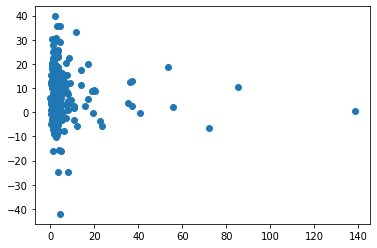

In [ ]:
# Plot the predictions verus actual
plt.scatter(y_test, predictions)

(array([ 22., 104.,  97.,  11.,   5.,   1.,   2.,   0.,   0.,   1.]),
 array([-37.64924456, -20.10292053,  -2.55659651,  14.98972752,
         32.53605155,  50.08237558,  67.62869961,  85.17502364,
        102.72134767, 120.2676717 , 137.81399572]),
 <a list of 10 Patch objects>)

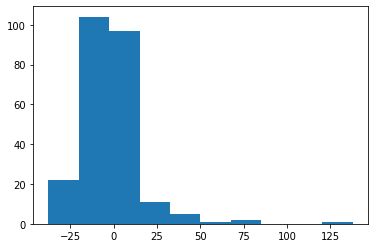

In [ ]:
#plot residuals to test assumption of Linear Regression
plt.hist(y_test - predictions)

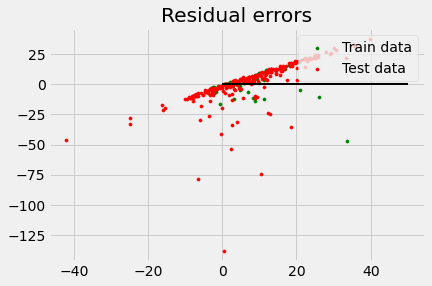

In [ ]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "red", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

# Modeling with pycaret

In [ ]:
# https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb
# https://www.pycaret.org/tutorials/html/REG102.html

In [ ]:
#install pycaret, for non colab notebooks, remove the ! before pip
!pip install pycaret # this can take about 2 minutes to complete 

## IMPORTANT NOTE: Pycaret does not need to split the data into X_train etc.
#   Just the df with the target variable identified is all that is needed for Pycaret. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# important helper functions for pycaret in colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# parameter information at: https://www.pycaret.org/tutorials/html/REG102.html

from pycaret.regression import *

In [ ]:
# direct copy of code cell from Pycaret tutorial
#  using "df" name to define data rather than "data"
df = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(df.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (273, 28)
Unseen Data For Predictions: (0, 28)


In [ ]:
# set up the model and identify the target variable (i.e., Dependent Variable)
# This is needed if you do ANY regression. Later you will identify specific type of regresssion or
 # use compare function to look ALL possible regression methods. 
reg01 = setup(data = df, target = 'incident', session_id=123, normalize=True, transform_target=True) 
# setting normalize=True takes care of scaling problems between ordinal and continuous variables

# IMPORTANT NOTE: Pycaret will processing until you approve the automatic variable it suggests
# scroll to the bottom of the output cell and type "enter" key to accept or type "quit" to stop

,Description,Value
0,session_id,123
1,Target,incident
2,Original Data,"(273, 28)"
3,Missing Values,False
4,Numeric Features,26
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(191, 30)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='incident',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='incident')),
   

In [ ]:
# Builds all regression models. This is often called "autoML" for automatic machine learning
# these are good baseline models

#best = compare_models(exclude = ['ransac']) # exclude = ['ransac'] is from the tutorial
compare_models()
# This can take a little bit becasue it is building 15+ regression models. 
# Goal is low error terms (MAE, MSE, RMSE, RMSLE, MAPE) and high R2. 
# R2 ranges from zero to one. 
# R2 Values approaching zero are weak models, negative R2 means insignificant.  

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,4.9743,206.2444,11.4452,-0.1527,0.8554,0.9621,0.016
en,Elastic Net,4.9743,206.2444,11.4452,-0.1527,0.8554,0.9621,0.016
llar,Lasso Least Angle Regression,4.9743,206.2444,11.4452,-0.1527,0.8554,0.9621,0.286
dummy,Dummy Regressor,4.9743,206.2444,11.4452,-0.1527,0.8554,0.9621,0.016
omp,Orthogonal Matching Pursuit,4.9755,205.2066,11.4271,-0.1708,0.8633,0.9746,0.016
br,Bayesian Ridge,5.0064,206.0701,11.4571,-0.1720,0.8599,0.9788,0.018
rf,Random Forest Regressor,5.0263,204.2132,11.4204,-0.2057,0.8639,1.0444,0.259
lightgbm,Light Gradient Boosting Machine,5.0699,200.9090,11.3707,-0.2200,0.8665,1.0633,0.106
ridge,Ridge Regression,5.1074,205.0468,11.5012,-0.2487,0.8857,1.0676,0.018
huber,Huber Regressor,5.0866,205.6234,11.5198,-0.2582,0.8836,1.0597,0.302


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                precompute=False, random_state=123,
                                regressor=Lasso(alpha=1.0, copy_X=True,
                                                fit_intercept=True,
                                                max_iter=1000, normalize=False,
                                                positive=False,
                                                precompute=False,
                                                random_state=123,
                                                selection='cyclic', tol=0.0001,
                             

PowerTransformedTargetRegressor(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                precompute=False, random_state=123,
                                regressor=Lasso(alpha=1.0, copy_X=True,
                                                fit_intercept=True,
                                                max_iter=1000, normalize=False,
                                                positive=False,
                                                precompute=False,
                                                random_state=123,
                                                selection='cyclic', tol=0.0001,
                                                warm_start=False),
                                selection='cyclic', tol=0.0001,
             

In [ ]:
# List of the models available from Pycaret
models() # from Pycaret Tutorial

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# From Pycaret Tutorial
lin_reg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9620,40.3594,6.3529,-1.1361,0.8879,1.5496
1,3.8566,46.5152,6.8202,-0.1810,0.8012,0.8018
2,8.3427,976.6157,31.2509,-0.0575,0.9940,0.8473
3,7.5740,164.0211,12.8071,-0.3207,1.1101,0.6742
4,6.9636,281.1118,16.7664,-0.1000,0.9703,0.9336
5,8.5674,418.3503,20.4536,-0.1356,1.1212,1.0494
6,2.7675,17.8482,4.2247,-0.1819,0.7558,1.3573
7,3.9262,67.0273,8.1870,-0.0783,0.7871,1.0336
8,1.8313,6.1935,2.4887,-0.6310,0.6683,1.7171


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# identify the paramaters for the lin_reg
print(lin_reg)

PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))


In [ ]:
# Tuning models produced above
# This is considered iteration!

'''Tuning models explained: 
"Model tuning is also known as hyperparameter optimization. 
Hyperparameters are variables that control the training process. 
These are configuration variables that do not change during a Model training job. 
Model tuning provides optimized values for hyperparameters, which maximize your model's predictive accuracy."
https://www.mlexam.com/model-tuning/
'''

tuned_lr = tune_model(lin_reg)
#this might error out because the synthetic data did not significant models, see 'compare_models()' cell 

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False)), fold=None, round=4, n_iter=10, custom_grid=None, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
IN

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:47:31
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Linear Regression
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:10 is bigger than total combinations 4, setting search algorithm to grid
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing GridSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


ValueError: ignored

In [ ]:
# identify the paramaters for the tuned lin_reg
# Compare to lin_reg
print(tuned_lr)
print(lin_reg)

In [ ]:
#comparing model plots for model
plot_model(tuned_lr)

In [ ]:
#this allows you to assess all the features included, not just the default of the top 10 
plot_model(tuned_lr, plot='feature_all', scale = 1)

# Modeling with statsmodels.api

In [ ]:
#Load Library
# https://www.statsmodels.org/stable/api.html#regression
import statsmodels.api as sm


In [ ]:
# set models
# NOTE, this data is the same used in sklearn
testmodel = sm.OLS(y_train, X_train)
testmodel2 = testmodel.fit()
print(testmodel2.summary())
#this model summary provides the Coeffients for the Linear Regression
# The p-value is reported in the 'P>|t|' column.  
# The p-value should be below the alpha (deault of 0.5) to be considered significant. 

                            OLS Regression Results                            
Dep. Variable:               incident   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.019
Date:                Wed, 12 Oct 2022   Prob (F-statistic):              0.467
Time:                        17:54:11   Log-Likelihood:                -220.69
No. Observations:                  60   AIC:                             487.4
Df Residuals:                      37   BIC:                             535.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------